In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'/content/Cleaned_Data.csv')
df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales,Total_MarkDown,Expected_Sales
0,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,1,24924.5000,9046.00,33970.5000
1,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,2,50605.2700,9046.00,59651.2700
2,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,3,13740.1200,9046.00,22786.1200
3,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,4,39954.0400,9046.00,49000.0400
4,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,5,32229.3800,9046.00,41275.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,93,3337.7118,2941.26,6278.9718
536630,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,94,3710.8900,2941.26,6652.1500
536631,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,95,57108.9539,2941.26,60050.2139
536632,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,97,7191.9044,2941.26,10133.1644


In [ ]:
df.isnull().sum()

Store             0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
IsHoliday         0
Week_Number       0
Day               0
Month             0
Year              0
Dept              0
Weekly_Sales      0
Total_MarkDown    0
Expected_Sales    0
dtype: int64

In [ ]:
df.isna().sum()

Store             0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
IsHoliday         0
Week_Number       0
Day               0
Month             0
Year              0
Dept              0
Weekly_Sales      0
Total_MarkDown    0
Expected_Sales    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           536634 non-null  int64  
 1   Type            536634 non-null  int64  
 2   Size            536634 non-null  int64  
 3   Temperature     536634 non-null  float64
 4   Fuel_Price      536634 non-null  float64
 5   MarkDown1       536634 non-null  float64
 6   MarkDown2       536634 non-null  float64
 7   MarkDown3       536634 non-null  float64
 8   MarkDown4       536634 non-null  float64
 9   MarkDown5       536634 non-null  float64
 10  CPI             536634 non-null  float64
 11  Unemployment    536634 non-null  float64
 12  IsHoliday       536634 non-null  int64  
 13  Week_Number     536634 non-null  int64  
 14  Day             536634 non-null  int64  
 15  Month           536634 non-null  int64  
 16  Year            536634 non-null  int64  
 17  Dept      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,536634.0,22.208621,12.790580,1.0000,11.000000,22.00000,33.000000,45.000000
Type,536634.0,1.590516,0.666882,1.0000,1.000000,1.00000,2.000000,3.000000
Size,536634.0,136678.550960,61007.711800,34875.0000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,536634.0,58.771762,18.678716,-7.2900,45.250000,60.06000,73.230000,101.950000
Fuel_Price,536634.0,3.408310,0.430861,2.4720,3.041000,3.52300,3.744000,4.468000
MarkDown1,536634.0,6076.837067,6756.704647,-2781.4500,4743.000000,4743.00000,5046.740000,103184.980000
MarkDown2,536634.0,1522.654976,5664.605065,-265.7600,364.000000,364.00000,364.000000,104519.540000
MarkDown3,536634.0,858.715327,7858.369010,-179.2600,36.000000,36.00000,36.000000,149483.310000
MarkDown4,536634.0,2146.234726,4696.739291,0.2200,1176.000000,1176.00000,1176.000000,67474.850000
MarkDown5,536634.0,3520.091288,9581.529453,-185.1700,2727.000000,2727.00000,2852.190000,771448.100000


In [ ]:
df.skew()

Store              0.077555
Type               0.692920
Size              -0.325016
Temperature       -0.267460
Fuel_Price        -0.313840
MarkDown1          5.885635
MarkDown2          8.165716
MarkDown3         11.917200
MarkDown4          7.396055
MarkDown5         68.766417
CPI                0.037491
Unemployment       1.163461
IsHoliday          4.337745
Week_Number        0.161594
Day                0.011278
Month              0.151850
Year               0.130470
Dept               0.359150
Weekly_Sales       3.294303
Total_MarkDown    13.330209
Expected_Sales     4.635482
dtype: float64

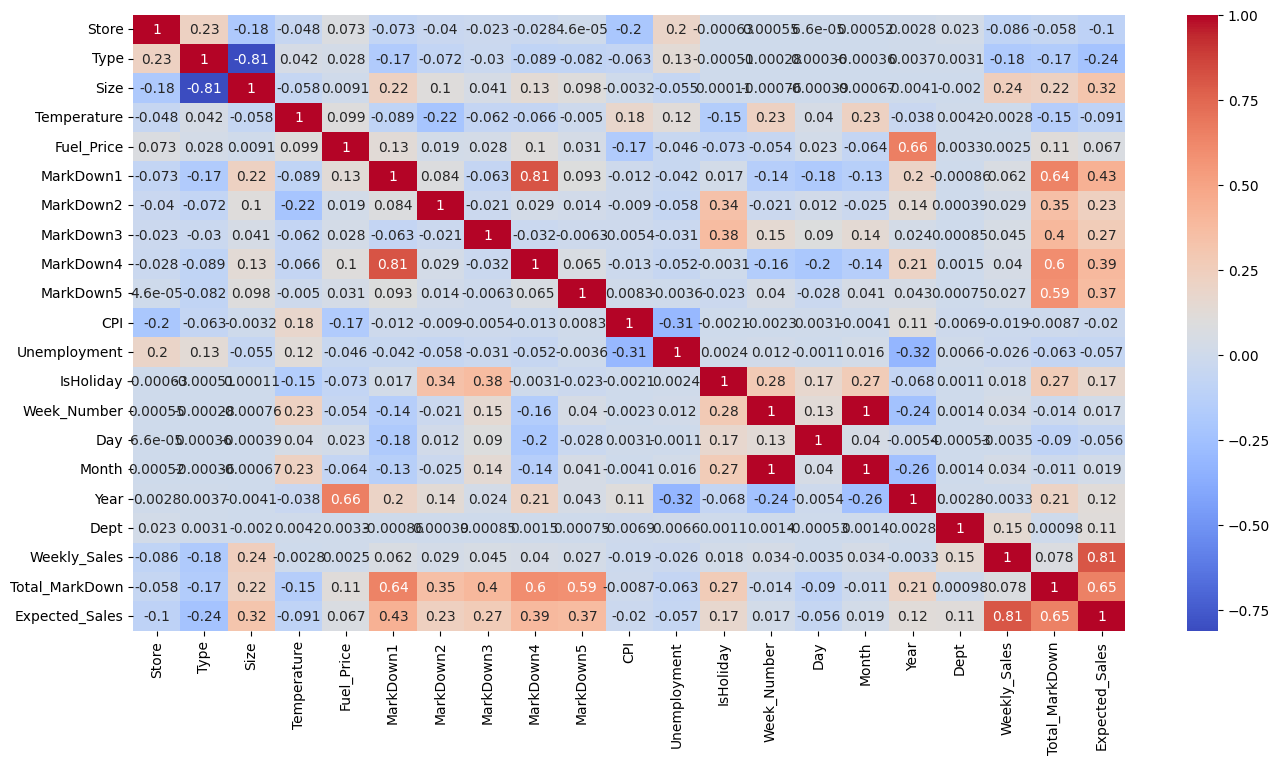

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load your dataset
from sklearn.model_selection import RandomizedSearchCV

# Assume your target variable is named 'target'
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#x_train.shape,x_test.shape,y_train.shape,y_test.shape

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((429307, 20), (107327, 20), (429307,), (107327,))

In [ ]:
from scipy.stats import skew, randint

# Perform hyperparameter tuning using GridSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a random forest regressor
rf_regressor = RandomForestRegressor()

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=10, cv=5, n_jobs= -1)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]})

In [36]:
# With Hyperparameter Tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the best hyperparameters
best_params = random_search.best_params_

# Train a random forest regressor using the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = best_rf_regressor.predict(X_train)

# Make predictions on the test set
test_predictions = best_rf_regressor.predict(X_test)

# Evaluate the performance on training set
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

# Evaluate the performance on test set
mse_test = mean_squared_error(y_test, test_predictions)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

# Print the results with hyperparameter tuning
print("With Hyperparameter Tuning:")
print("Best Hyperparameters:", best_params)
print("Training Set Metrics:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R2:", r2_train)
print("\nTest Set Metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R2 :",r2_test)


With Hyperparameter Tuning:
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
Training Set Metrics:
MSE: 454678.0539487852
RMSE: 674.2981936419415
MAE: 31.15348967367016
R2: 0.9991314535370341

Test Set Metrics:
MSE: 971730.7154851437
RMSE: 985.7640262685303
MAE: 46.38289371308226
R2 : 0.998186943746157


In [38]:
# Without Hyperparameter Tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a random forest regressor without hyperparameter tuning
rf_regressor_without_tuning = RandomForestRegressor()
rf_regressor_without_tuning.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_without_tuning = rf_regressor_without_tuning.predict(X_train)

# Make predictions on the test set
test_predictions_without_tuning = rf_regressor_without_tuning.predict(X_test)

# Evaluate the performance on training set without hyperparameter tuning
mse_train_without_tuning = mean_squared_error(y_train, train_predictions_without_tuning)
rmse_train_without_tuning = sqrt(mse_train_without_tuning)
mae_train_without_tuning = mean_absolute_error(y_train, train_predictions_without_tuning)
r2_train_without_tuning = r2_score(y_train, train_predictions_without_tuning)

# Evaluate the performance on test set without hyperparameter tuning
mse_test_without_tuning = mean_squared_error(y_test, test_predictions_without_tuning)
rmse_test_without_tuning = sqrt(mse_test_without_tuning)
mae_test_without_tuning = mean_absolute_error(y_test, test_predictions_without_tuning)
r2_test_without_tuning = r2_score(y_test, test_predictions_without_tuning)


# Print the results without hyperparameter tuning
print("\nWithout Hyperparameter Tuning:")
print("Training Set Metrics:")
print("MSE:", mse_train_without_tuning)
print("RMSE:", rmse_train_without_tuning)
print("MAE:", mae_train_without_tuning)
print("R2:", r2_train_without_tuning)
print("\nTest Set Metrics:")
print("MSE:", mse_test_without_tuning)
print("RMSE:", rmse_test_without_tuning)
print("MAE:", mae_test_without_tuning)
print("R2:", r2_test_without_tuning)


Without Hyperparameter Tuning:
Training Set Metrics:
MSE: 46248.28982319174
RMSE: 215.05415555899341
MAE: 14.982801116789602
R2: 0.9999116544372545

Test Set Metrics:
MSE: 751463.5009985977
RMSE: 866.8699446852438
MAE: 38.91376828360934
R2: 0.9985979185608638


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor().fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

data ={ 'Train_Mean_Square_Error': mean_squared_error(y_train, y_train_pred),
        'Test_Mean_Square_Error': mean_squared_error(y_test, y_test_pred),
        'Train_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_Mean_Absolute_Error': mean_absolute_error(y_train, y_train_pred),
        'Test_Mean_Absolute_Error': mean_absolute_error(y_test, y_test_pred),
        'Train_R2_Score': r2_score(y_train, y_train_pred ),
        'Test_R2_Score': r2_score(y_test, y_test_pred)
        }
data

{'Train_Mean_Square_Error': 74916.17868815547,
 'Test_Mean_Square_Error': 786259.9856120413,
 'Train_Root_Mean_Square_Error': 273.7081998920666,
 'Test_Root_Mean_Square_Error': 886.7130232561385,
 'Train_Mean_Absolute_Error': 15.132984036967011,
 'Test_Mean_Absolute_Error': 39.030367285790824,
 'Train_R2_Score': 0.9998568917469111,
 'Test_R2_Score': 0.9985329952410235}

In [39]:
# Save the trained model

import pickle

# Save the trained model with hyperparameter tuning using pickle
with open('trained_model_with_tuning.pkl', 'wb') as model_file:
    pickle.dump(best_rf_regressor, model_file)

# Save the trained model without hyperparameter tuning using pickle
with open('trained_model_without_tuning.pkl', 'wb') as model_file:
    pickle.dump(rf_regressor_without_tuning, model_file)


In [40]:
# Save the trained model using joblib

from joblib import dump

# Save the trained model with hyperparameter tuning using joblib
dump(best_rf_regressor, 'trained_model_with_tuning.joblib')

# Save the trained model without hyperparameter tuning using joblib
dump(rf_regressor_without_tuning, 'trained_model_without_tuning.joblib')


['trained_model_without_tuning.joblib']

In [31]:
# Save the trained model

import pickle

with open('Random_Forest_Model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [41]:
import joblib

# Save the model to a compressed joblib file
joblib.dump(rf_model, 'random_forest_model.joblib.gz')


['random_forest_model.joblib.gz']